In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
cv2.__version__

'3.4.3'

In [2]:
image = cv2.imread('ball.jpg').astype(np.float32)/255.

In [3]:
def show(image, title=""):
    
    # Figure size in inches
    plt.figure(figsize=(6, 6))

    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    plt.title(title)

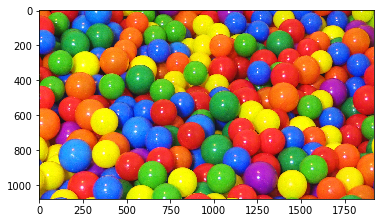

In [4]:
plt.imshow(image[..., ::-1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


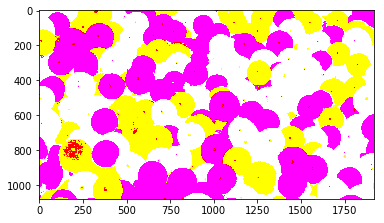

In [5]:
image_lab = cv2.cvtColor(image,cv2.COLOR_BGR2Lab)
plt.imshow(image_lab)

In [6]:
data = image_lab.reshape(-1,3)

In [7]:
data.shape

(2073600, 3)

In [8]:
def call_f(num_classes = 4):


    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.1)
    _, labels, centers = cv2.kmeans(data, num_classes, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


    segmented_lab = centers[labels.flatten()].reshape(image.shape)
    segmented = cv2.cvtColor(segmented_lab, cv2.COLOR_Lab2RGB)


    plt.subplot(121)
    plt.axis('off')
    plt.title('original')
    plt.imshow(image[:, :, [2, 1, 0]])
    plt.subplot(122)
    plt.axis('off')
    plt.title('segmented with : ' + str(num_classes) + ' clusters')
    plt.imshow(segmented)
    plt.show()

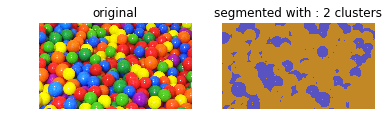

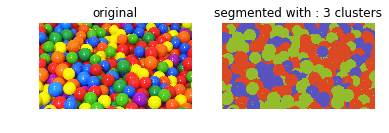

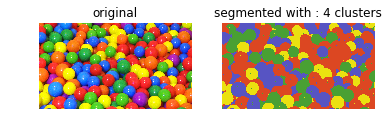

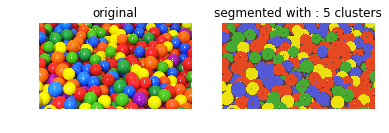

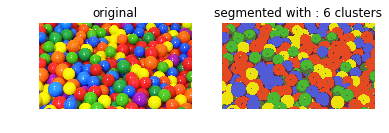

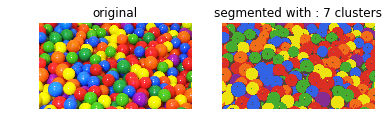

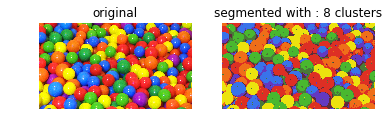

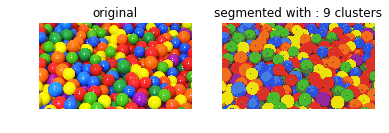

In [9]:
for i in range(2,10):
    call_f(i)